In [6]:
"""Code by Michael Klein
ASTR400B
This is a code that will answer the questions outlined by Dr. Gurtina in her ResearchAssignment PDF. Specifically,
we will compute the density profile of the disk/bulge of the M31/MW remnant. We will compare it to a sersic profile
(Lab 6) and ###Question about Concentration###. This code will also show the shapes
of the disk and bulge in an attempt to see how they had evolved. Finally, this code will calculate the velocity 
dispersion of the disk, the rotation curve, and the Vrot/sigma ratio as they evolve over time.
References used: Brooks & Christensen(2016), Hopkins et al.(2008), and Querejeta et al.(2015)
Some code used from: R. Hoffman and E. Patel
"""

'Code by Michael Klein\nASTR400B\nThis is a code that will answer the questions outlined by Dr. Gurtina in her ResearchAssignment PDF. Specifically,\nwe will compute the density profile of the disk/bulge of the M31/MW remnant. We will compare it to a sersic profile\n(Lab 6) and ###Question about Concentration###. This code will also show the shapes\nof the disk and bulge in an attempt to see how they had evolved. Finally, this code will calculate the velocity \ndispersion of the disk, the rotation curve, and the Vrot/sigma ratio as they evolve over time.\nReferences used: Brooks & Christensen(2016), Hopkins et al.(2008), and Querejeta et al.(2015)\n'

In [107]:
# Import relevant modules
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import astropy.units as u
from MassDistributionRes import MassProfile # This will be used for the Sersic profile comparison as well as for 
# the density profile
from ReadFile import read # This will read files
from CenterOfMass import CenterOfMass # This will import the center of mass position and velocity functions
# ADD MORE IF NEEDED


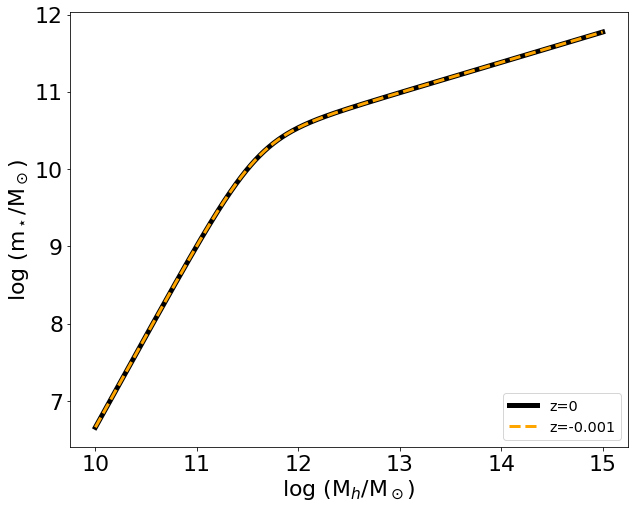

In [137]:
# Proof that M/L~1 for MW and M31 using Moster Relation and Abundance Matching from Lab 5 which followed work from
# Moster et al. 2013 (MNRAS, 428, 3121)
# Andromeda has a redshift of z=-0.001 (from NASA/IPAC Extragalactic Database)

class AbundanceMatching:
    
    def __init__(self, M, z):
        " input: Halo mass (Msun) and Redshift"
        
        #initializing the parameters:
        self.M = M # Halo Mass in Msun
        self.z = z  # Redshift
        
        
    def logM1(self):
        """eq. 11 of Moster 2013
        input : redshift
        output: M1, characteristic mass in log(Msun)
        """
        M10      = 11.59
        M11      = 1.195 
        return M10 + M11*(self.z/(1+self.z))  
    
    
    def N(self):
        """eq. 12 of Moster 2013
        input: redshift
        output: Normalization for eq. 2
        """
        N10      = 0.0351
        N11      = -0.0247
    
        return N10 + N11*(self.z/(1+self.z))
    
    
    def Beta(self):
        """eq. 13 of Moster 2013
        input: redshift
        output: power of the low mass slope"""
        beta10      = 1.376
        beta11      = -0.826
    
        return beta10 + beta11*(self.z/(1+self.z))
    
    def Gamma(self):
        """eq. 14 of Moster 2013
        input: redshift
        output: power of the high mass slope """
        gamma10      = 0.608
        gamma11      = 0.329
    
        return gamma10 + gamma11*(self.z/(1+self.z))
    
    
    def SHMratio(self):
        """ 
        eq. 2 of Moster + 2013
        Inputs: halo mass M in solar masses (NOT in logspace)
           redshift
        Outputs: Stellar mass to halo mass ratio
        """
        M1 = 10**self.logM1() # Converting characteristic mass to Msun from Log(Msun)
        A = (self.M/M1)**(-self.Beta())  # Low mass end
        B = (self.M/M1)**(self.Gamma())   # High mass end
        Norm = 2*self.N() # Normalization
    
        SHMratio = Norm*(A+B)**(-1)
    
        return SHMratio
    
# The stellar mass 
    def StellarMass(self):
        """ using eq. 2 of Moster + 2013 (SHMratio) this will return the stellar mass 
        returns the Stekkar Mass in Msun"""
        
        return self.M*self.SHMratio()
  
Mh = np.logspace(10,15,1000) # Logarithmically spaced array

# Define Instances of the Class for each redshift
MosterMW = AbundanceMatching(Mh,0)
MosterM31 = AbundanceMatching(Mh,-0.001001)


fig,ax = plt.subplots(figsize=(10,8))


#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size


# Plotting MW and M31 with z=0, and z=-0.001001 respectively
plt.plot(np.log10(Mh), np.log10(MosterMW.StellarMass()),color='black',linewidth = 5, label='z=0')
plt.plot(np.log10(Mh), np.log10(MosterM31.StellarMass()),color='orange',linestyle='--',linewidth = 3, label='z=-0.001')


# Axes labels 
plt.xlabel('log (M$_h$/M$_\odot$)',fontsize=22) 
plt.ylabel('log (m$_\star$/M$_\odot$)', fontsize=22)

# Legend
plt.legend(loc='lower right',fontsize='x-large')


    

In [108]:

# Lab 6 
# Create an instance of the mass profile class for MW and M31
MW = MassProfile('MW',0)
M31 = MassProfile('M31',0)
# Create an array of radii from 0.1 kpc to 30 kpc in increments of 0.1
r = np.arange(0.1,30,0.1)

In [109]:
# Define a new array DiskMass and BulgeMass for MW and M31 respectively that uses MassEnclosed within 
# MassDistributionRes to compute the mass profile of the disk and bulge
DiskMassMW = MW.MassEnclosed(2,r) 
DiskMassM31 = M31.MassEnclosed(2,r) 
BulgeMassMW = MW.MassEnclosed(3,r)
BulgeMassM31 = M31.MassEnclosed(3,r)

UnitConversionError: Can only apply 'less' function to dimensionless quantities when other argument is not a quantity (unless the latter is all zero/infinity/nan)

In [103]:
# Compute the density profile using I = L/(4*pi*d**2) if we are assuming M/L~1
DiskIMW = DiskMassMW/4/np.pi/r**2
DiskIM31 = DiskMassM31/4/np.pi/r**2
BulgeIMW = BulgeMassMW/4/np.pi/r**2
BulgeIM31 = BulgeMassM31/4/np.pi/r**2

NameError: name 'DiskMassMW' is not defined

In [ ]:
# Computing the half-light radius/half-mass radius, since we are assuming M/L~1